In [2]:
image1_path = '/Users/nazarkalyniouk/Downloads/personwalking1.jpeg'
image2_path = '/Users/nazarkalyniouk/Downloads/personwalking2.jpeg'
image3_path = '/Users/nazarkalyniouk/Downloads/personwalking3.webp'
image4_path = '/Users/nazarkalyniouk/Downloads/personwalking4.jpeg'
image_path_child1 = '/Users/nazarkalyniouk/Downloads/childwalking1.jpeg'
im3 = '/Users/nazarkalyniouk/Downloads/cw3.jpeg'
im_child = '/Users/nazarkalyniouk/Downloads/child.jpeg'
pic = '/Users/nazarkalyniouk/Downloads/pic.webp'
pic1 = '/Users/nazarkalyniouk/Downloads/kid.jpeg'

In [3]:
import cv2

body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')
image = cv2.imread(image1_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bodies = body_cascade.detectMultiScale(gray, 1.1, 4)

if len(bodies) > 0:
    center_x = bodies[0][0] + bodies[0][2] // 2
    center_y = bodies[0][1] + bodies[0][3] // 2
    center_point = (center_x, center_y)
    
    img_height, img_width = image.shape[:2]
    img_center_point = (img_width // 2, img_height // 2)
    
    print("Center point of the person:", center_point)
    print("Center point of the image:", img_center_point)

    for (x, y, w, h) in bodies:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.circle(image, center_point, 5, (0, 255, 0), -1)
    cv2.circle(image, img_center_point, 5, (0, 0, 255), -1)
    
    cv2.imshow('Detected Person', image)

else:
    print("No person detected in the image.")

Center point of the person: (242, 346)
Center point of the image: (204, 306)


Center point of the person: (245, 151)
Center point of the image: (194, 140)


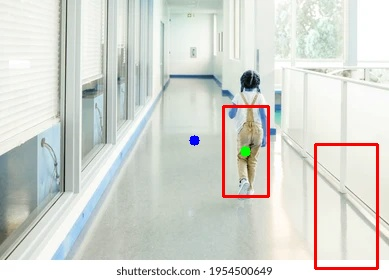

In [4]:
import cv2
from IPython.display import display, Image

body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')
image = cv2.imread(pic)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

bodies = body_cascade.detectMultiScale(gray, 1.1, 4)

if len(bodies) > 0:
    center_x = bodies[0][0] + bodies[0][2] // 2
    center_y = bodies[0][1] + bodies[0][3] // 2
    center_point = (center_x, center_y)
    
    img_height, img_width = image.shape[:2]
    img_center_point = (img_width // 2, img_height // 2)
    
    print("Center point of the person:", center_point)
    print("Center point of the image:", img_center_point)

    for (x, y, w, h) in bodies:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.circle(image, center_point, 5, (0, 255, 0), -1)
    cv2.circle(image, img_center_point, 5, (0, 0, 255), -1)
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    display(Image(data=cv2.imencode('.jpg', image_rgb)[1]))
else:
    print("No person detected in the image.")


Center point of the person: (411, 253)
Center point of the image: (325, 217)
Relative distance: 0.13230769230769232
Degrees off-center: 13.23%


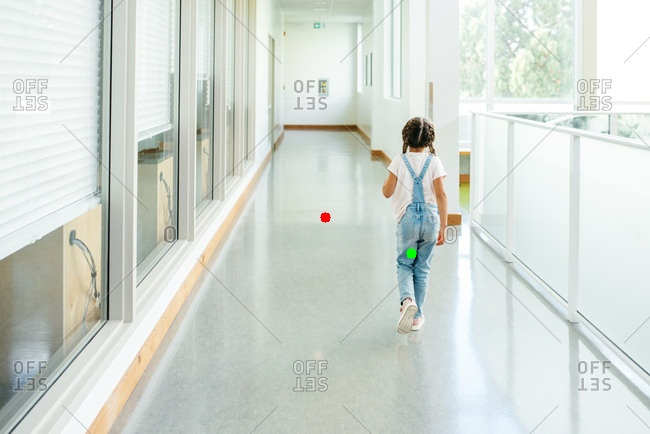

no correction needed


In [6]:
import cv2
from IPython.display import display, Image
import numpy as np

body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')
image = cv2.imread(im_child)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bodies = body_cascade.detectMultiScale(gray, 1.1, 4)

if len(bodies) > 0:
    center_x = bodies[0][0] + bodies[0][2] // 2
    center_y = bodies[0][1] + bodies[0][3] // 2
    center_point = (center_x, center_y)
    
    img_height, img_width = image.shape[:2]
    img_center_point = (img_width // 2, img_height // 2)
    
    relative_distance = (center_x - img_center_point[0]) / img_width
    degrees_off_center = round(np.abs(relative_distance)*100, 2)

    print("Center point of the person:", center_point)
    print("Center point of the image:", img_center_point)
    print("Relative distance:", np.abs(relative_distance))
    print(f"Degrees off-center: {degrees_off_center}%")

    cv2.circle(image, center_point, 5, (0, 255, 0), -1)
    cv2.circle(image, img_center_point, 5, (0, 0, 255), -1)
    
    display(Image(data=cv2.imencode('.jpg', image)[1]))
else:
    print("No person detected in the image.")
    
if degrees_off_center <= 13.8 and degrees_off_center >= 9.2:
    print("no correction needed")
else:
    print("correction needed")


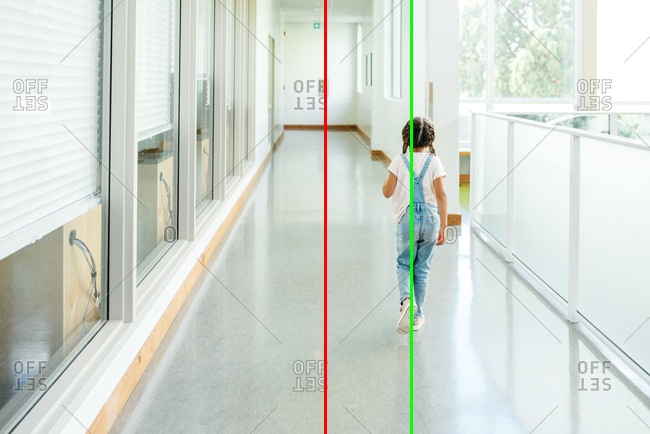

Center point of the person: (411, 253)
Center point of the image: (325, 217)
Relative distance: 0.13230769230769232
Degrees off-center: 13.23%
correction needed


In [7]:
import cv2
from IPython.display import display, Image

body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')
image = cv2.imread(im_child)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
num_bodies = body_cascade.detectMultiScale(img_gray, 1.1, 4)

if len(bodies) > 0:
    center_x = num_bodies[0][0] + int(num_bodies[0][2] / 2)
    center_y = num_bodies[0][1] + int(num_bodies[0][3] / 2)
    center_point = (center_x, center_y)
    
    img_height = image.shape[0]
    img_width = image.shape[1]
    img_center_point = (int(img_width / 2), int(img_height / 2))
    
    relative_distance = (center_x - img_center_point[0]) / img_width

    cv2.line(image, (center_x, 0), (center_x, img_height), (0, 255, 0), 2)
    cv2.line(image, (img_center_point[0], 0), (img_center_point[0], img_height), (0, 0, 255), 2)

    display(Image(data=cv2.imencode('.jpg', image)[1]))
    
    print("Center point of the person:", center_point)
    print("Center point of the image:", img_center_point)
    print("Relative distance:", np.abs(relative_distance))
    print(f"Degrees off-center: {np.round(relative_distance*100,2)}%")
    
else:
    print("No person detected in the image.")

    
    
if degrees_off_center <= 9:
    print("no correction needed")
else:
    print("correction needed")
